## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

In [ ]:
# 모듈 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 시각화 관련 모듈 불러오기
import plotly.graph_objects as go
from ipywidgets import widgets

# 타이타닉 데이터 불러오기 및 데이터 확인

In [ ]:
# 타이타닉 데이터 불러오기 및 확인하기
df = pd.read_csv('/content/drive/MyDrive/YearDream-2th/Project/Python_Advance_Project/Geun/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# 불러온 데이터의 종류(타입) 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
# 각 컬럼들의 결측치 값의 개수 확인하기
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

불러온 데이터를 확인하여 총 1309개의 데이터가 있지만,  
몇몇 컬럼`( 데이터의 개수가 1309개가 되지않는 컬럼들 )`은 결측치가 있음을 확인 할 수 있습니다.

In [ ]:
# DataFrame 의 기초 통계량 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


`df.describe()` 매서드를 통해 확인해 볼 DataFrame의 기본적인 기초 통계량을 확인합니다.  
여기서 결측치 값들을 평균으로 대체해도 되는 컬럼을 정해봅시다.  
Age, fare 는 나이와, 지불한 운임에 대한 컬럼이기 때문에 평균 값을 대입하여 결측치 값을 대체해 봅시다.

## 데이터 결측치 값 대체하기

In [ ]:
# 나이에 대한 평균
age_mean = df['age'].mean()

In [ ]:
# 'age' 컬럼의 결측치를 평균값으로 대체하기
nan = df['age'].isna()
df.loc[nan, 'age'] = age_mean

In [ ]:
# 결측치 값이 제대로 바꿔졌는지 결측치 확인하기
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

`'age'`컬럼의 결측치는 사라졌다  
`'Fare'` 또한 평균값으로 대체 해보자.

In [ ]:
# Fare 에 대한 평균
fare_mean = df['fare'].mean()

In [ ]:
# 'fare' 컬럼의 결측치값을 평균값으로 대체하기
nan_fare = df['fare'].isna()
df.loc[nan_fare , 'fare'] = fare_mean

In [ ]:
# 결측치 값이 제대로 바뀌었는지 확인하기
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# 생존자 수 확인

In [ ]:
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


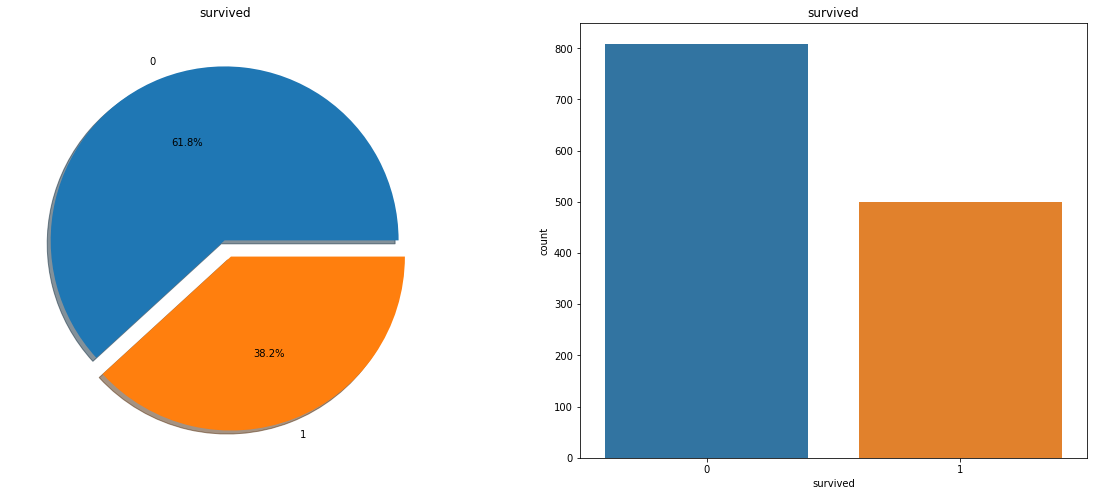

In [ ]:
# 시각화

f,ax = plt.subplots(1,2,figsize=(20,8))
df['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('survived')
ax[0].set_ylabel('')

#print(ax[1])
sns.countplot('survived', data=df, ax=ax[1])
ax[1].set_title('survived')
plt.show()

탑승자 총 1309명 중 500명 (38.2 %) 이 생존했고, 809 (61.8 %) 가 사망한 것을 알 수 있다.

# 각 데이터를 생존률과 연관지어 비교

## 객실 등급(pclass)에 따른 생존율 비교

In [ ]:
df_pclass = df[['pclass', 'survived']].groupby(['pclass'], as_index = False).mean().sort_values(by = 'survived', ascending = False)
df_pclass

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


In [ ]:
df_pclass = pd.crosstab(df.pclass,df.survived,margins=True).style.background_gradient(cmap='summer_r')
df_pclass

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


DataFame을 시각화 해봅시다

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'pclass_Survived')

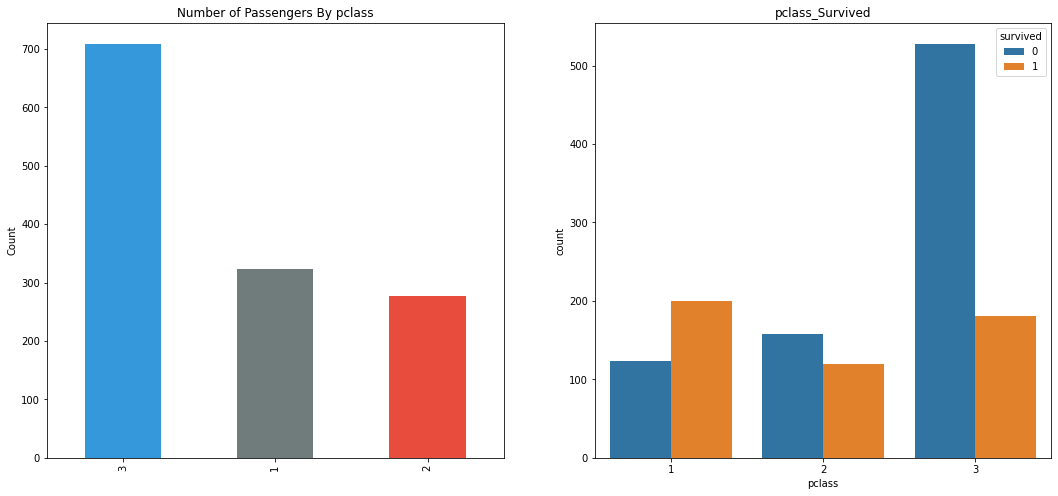

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df['pclass'].value_counts().plot.bar(color=['#3498DB','#707B7C','#E74C3C'], ax=ax[0])
ax[0].set_title('Number of Passengers By pclass')
ax[0].set_ylabel('Count')
sns.countplot('pclass',hue='survived',data=df,ax=ax[1])
ax[1].set_title('pclass_Survived')


객실 등급이 높을 수록 생존율이 좋은걸 알 수 있습니다.  
그렇다면 각 등급별로 성별에 따른 생존율을 확인해 볼 수 있을까? 확인해봅시다.

## 성별에 따른 생존율

In [ ]:
df_sex = df.groupby('sex').agg({'survived':np.mean})
df_sex

,survived
sex,
female,0.727468
male,0.190985


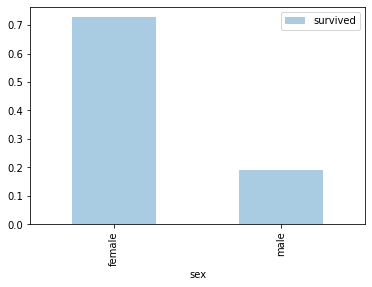

In [ ]:
df_sex.plot.bar(color = ['#A9CCE3', '#E6B0AA'])

성별에 따른 생존율이 여성이 압도적으로 높음을 확인할 수 있다.

## 등급별로 성별에 따른 생존율

In [ ]:
pd.crosstab([df.sex, df.survived], df.pclass, margins=True).style.background_gradient(cmap='summer_r')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


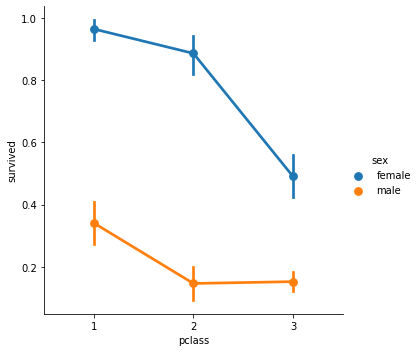

In [ ]:
sns.factorplot('pclass','survived',hue='sex',data=df)

1등급에 승선한 여성의 생존율이 가장 높게 나왔으며,  
전체 등급에서 여성의 비율이 높게 나온다
  
등급별로 생존율의 차이가 있고,  
성별에 따라 생존율의 차이가 있음을 확인할 수 있었다.  
하지만, 2등급의 남성의 생존율이 3등급의 남성의 생존율보다 낮은걸 확인 할 수 있다.

In [69]:
df['initial'] = 0
for i in df:
  df['initial'] = df.name.str.extract('([A-Za-z]+)\.')
  df['initial'].unique()

pd.crosstab(df.initial, df.sex).T.style.background_gradient(cmap='summer_r')

initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [70]:
df['initial'].replace(['mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col','Rev','Capt','Sir','Don'], \
['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [71]:
df.groupby('initial')['age'].mean()

initial
Dona      39.000000
Master     8.682444
Miss      23.378434
Mlle      24.000000
Mr        31.933067
Mrs       36.064275
Other     44.923077
Name: age, dtype: float64

In [73]:
df.loc[(df.age.isnull())&(df.initial=='Dona'),'age']=39
df.loc[(df.age.isnull())&(df.initial=='Master'),'age']=5
df.loc[(df.age.isnull())&(df.initial=='Miss'),'age']=22
df.loc[(df.age.isnull())&(df.initial=='Mlle'),'age']=24
df.loc[(df.age.isnull())&(df.initial=='Mr'),'age']=33
df.loc[(df.age.isnull())&(df.initial=='Mrs'),'age']=37
df.loc[(df.age.isnull())&(df.initial=='Other'),'age']=45
df.age.isnull().any()

False